In [1]:
%matplotlib inline
# Dependencies and Setup
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

# # Combine the data into a single dataset
combined_df = pd.merge(city_data_df, ride_data_df, on = "city")
reduced_combined_df = combined_df.drop_duplicates(subset='city',keep = 'first')

# # Display the data table for preview
combined_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [10]:
# Obtain the x and y coordinates for each of the three city types
#  * Average Fare ($) Per City
# * Total Number of Rides Per City
# * Total Number of Drivers Per City
# * City Type (Urban, Suburban, Rural)

all_cities_df = pd.DataFrame({'Average Fare': \
                              combined_df.groupby('city')['fare'].mean(), 'Total Number of Rides': \
                              combined_df.groupby('city')['ride_id'].count(), 'Total Number of Drivers': \
                             reduced_combined_df.set_index('city')['driver_count'],\
                              'City Type': reduced_combined_df.set_index('city')['type']})

#need to change index to column for cities 
all_cities_df = all_cities_df.reset_index(level=0)

all_cities_df= all_cities_df.rename(index=str, columns={'index': 'City'})

# all_cities_df.head()

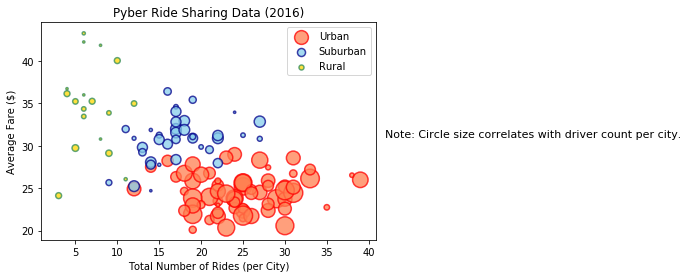

In [11]:
# # # # # Build the scatter plots for each city types
urban_df = all_cities_df[all_cities_df['City Type'] == 'Urban']
suburban_df = all_cities_df[all_cities_df['City Type'] == 'Suburban']
rural_df = all_cities_df[all_cities_df['City Type'] == 'Rural']


urban_df
plt.scatter(urban_df['Total Number of Rides'], urban_df['Average Fare'], label = 'Urban', \
            s= urban_df['Total Number of Drivers'] * 5, color=["Coral"], edgecolor="red", alpha = .75, marker="o", linewidths=1.5)
plt.scatter(suburban_df['Total Number of Rides'], suburban_df['Average Fare'], label = 'Suburban', \
            s= suburban_df['Total Number of Drivers'] * 5, color=["SkyBlue"], edgecolor="darkblue", alpha = .75, marker="o", linewidths=1.5)
plt.scatter(rural_df['Total Number of Rides'], rural_df['Average Fare'], label = 'Rural', \
            s= rural_df['Total Number of Drivers'] * 5, color=["Gold"], edgecolor="seagreen", alpha = .75, marker="o", linewidths=1.5)

# # # Incorporate the other graph properties

plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (per City)')
plt.ylabel('Average Fare ($)')

# # Create a legend

plt.legend()

# Incorporate a text label regarding circle size

plt.text(42,31,"Note: Circle size correlates with driver count per city.", fontsize = 11)

# Save Figure
plt.savefig("../Images/PyBubble.png")

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

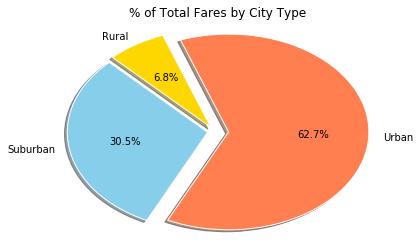

In [4]:
# Calculate Type Percents
total_fares_df = pd.DataFrame({'Total Fare': round(combined_df.groupby('type')['fare'].sum()/combined_df['fare'].sum()*100,1)})
total_fares_df= total_fares_df.reset_index(level=0)
total_fares_df

# Build Pie Chart
colors = ['Gold', 'Skyblue', 'Coral']
explode = (0.05,.05,.1)
plt.pie(total_fares_df['Total Fare'], explode=explode, labels=total_fares_df['type'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=110, wedgeprops={'edgecolor':'white'})
plt.axis('tight')
plt.title('% of Total Fares by City Type')

# # # Save Figure
plt.savefig("../Images/PyPieFares.png")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

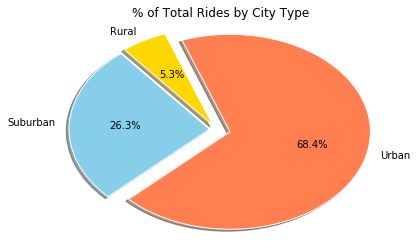

In [6]:
# Calculate Ride Percents
total_rides_df = pd.DataFrame({'Total Rides': round(combined_df.groupby('type')['ride_id'].count()/combined_df['ride_id'].count()*100,1)})
total_rides_df= total_rides_df.reset_index(level=0)
total_rides_df

# # Build Pie Chart
colors = ['Gold', 'Skyblue', 'Coral']
explode = (0.05,.05,.1)
plt.pie(total_rides_df['Total Rides'], explode=explode, labels=total_rides_df['type'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=110, wedgeprops={'edgecolor':'white'})
plt.axis('tight')
plt.title('% of Total Rides by City Type')

# # # Save Figure
plt.savefig("../Images/PyPieRides.png")


In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

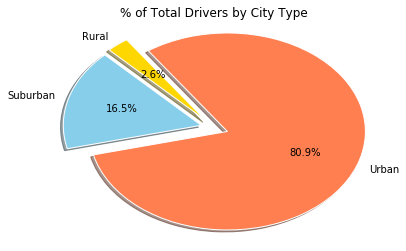

In [8]:
# Calculate Driver Percents
total_drivers_df = pd.DataFrame({'Total Drivers': round(reduced_combined_df.groupby('type')['driver_count'].sum()/reduced_combined_df['driver_count'].sum()*100,1)})
total_drivers_df= total_drivers_df.reset_index(level=0)
total_drivers_df

# # # Build Pie Chart
colors = ['Gold', 'Skyblue', 'Coral']
explode = (0.1,.1,.1)
plt.pie(total_drivers_df['Total Drivers'], explode=explode, labels=total_drivers_df['type'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=125, wedgeprops={'edgecolor':'white'})
plt.axis('tight')
plt.title('% of Total Drivers by City Type')

# # # Save Figure
plt.savefig("../Images/PyPieDrivers.png")


In [9]:
# Show Figure
plt.show()